In [ ]:
from PIL import Image, ImageShow
from google.colab import drive
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import cv2

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train[13]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 222, 225,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 147, 234, 252, 176,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         23, 197, 253, 252, 208,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        178, 252, 253, 117,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57,
        252, 252, 253,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 222,
        253, 253,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 252,
        179,  27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 246, 220,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79, 253, 252, 135,
         28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16, 140, 253, 252, 118,
          0,   0,   0,   0, 111, 140, 140,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  13, 191, 255, 253,  56,
          0,   0, 114, 113, 222, 253, 253, 255,  27,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  76, 252, 253, 223,  37,
          0,  48, 174, 252, 252, 242, 214, 253, 199,  31,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  13, 109, 252, 228, 130,   0,
         38, 165, 253, 233, 164,  49,  63, 253, 214,  31,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  73, 252, 252, 126,   0,  23,
        178, 252, 240, 148,   7,  44, 215, 240, 148,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 119, 252, 252,   0,   0, 197,
        252, 252,  63,   0,  57, 252, 252, 140,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135, 253, 174,   0,  48, 229,
        253, 112,   0,  38, 222, 253, 112,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135, 252, 173,   0,  48, 227,
        252, 158, 226, 234, 201,  27,  12,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  57, 104, 240,
        252, 252, 253, 233,  74,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  51, 242, 252, 253, 252, 252,
        252, 252, 240, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  75, 189, 253, 252, 252,
        157, 112,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
model_1 = keras.Sequential([
    keras.Input(shape=input_shape),
    Flatten(),
    Dense(50),
    Dense(1)
    ] )

In [ ]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1397
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1397
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1397
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1397
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1397
CPU times: user 26.5 s, sys: 1.35 s, total: 27.9 s
Wall time: 42 s


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model_2 = keras.Sequential([
          keras.Input(shape=input_shape),
          Flatten(),
          Dense(50, activation = 'relu'),
          Dense(10, activation = 'softmax')
          ] )

In [ ]:
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
%%time
history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3268 - accuracy: 0.9084
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1617 - accuracy: 0.9526
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1196 - accuracy: 0.9647
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0806 - accuracy: 0.9751
CPU times: user 28.3 s, sys: 1.5 s, total: 29.8 s
Wall time: 26.4 s


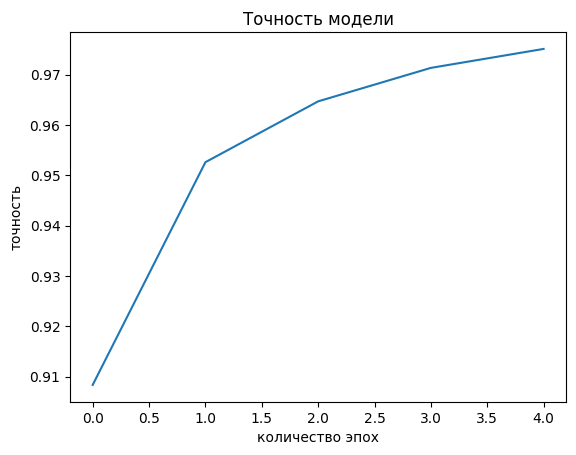

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

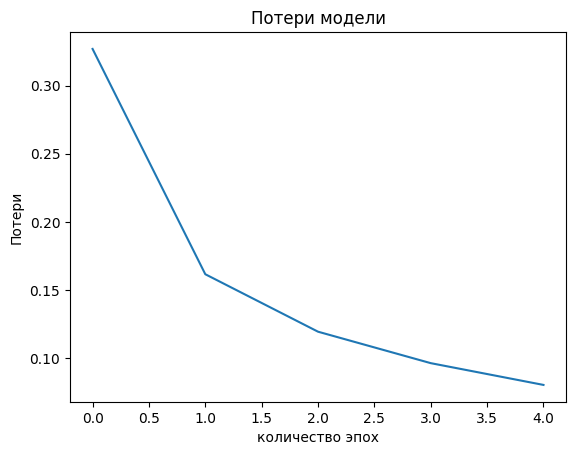

In [ ]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [ ]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9727


[0.09685353189706802, 0.9726999998092651]

In [ ]:
%%time
history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data = (x_test, y_test_cat))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0952 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0848 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0846 - val_accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0866 - val_accuracy: 0.9737
CPU times: user 31.9 s, sys: 1.78 s, total: 33.6 s
Wall time: 41.5 s


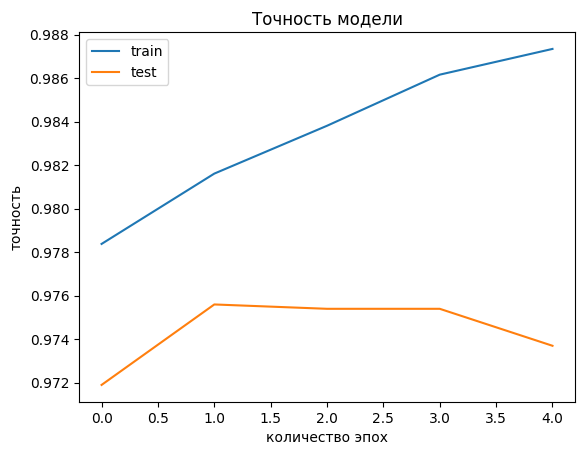

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

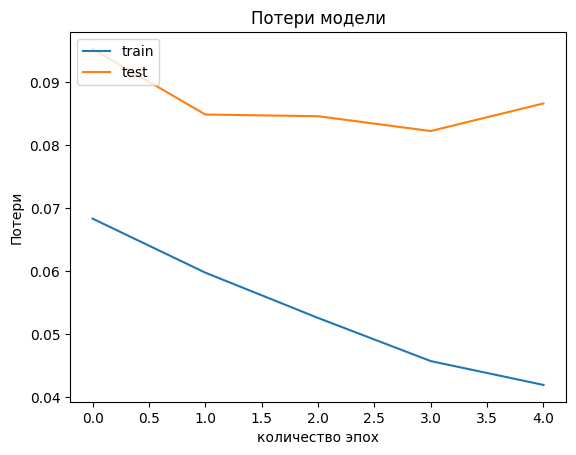

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# image = Image.open('/content/drive/MyDrive/picture/Drawind_6.png')
image = cv2.imread('/content/drive/MyDrive/picture/Drawind_6.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
image_reshaped = np.expand_dims(image_resized, axis=-1)
image_batch = np.expand_dims(image_reshaped, axis=0)

In [ ]:
result = model_2.predict(image_batch)

print(result)


1/1 [==============================] - 0s 68ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
